In [1]:
#Relevant imports

import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import os


from xgboost import XGBClassifier
import xgboost as xgb

from sklearn import preprocessing
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score, recall_score, matthews_corrcoef



In [2]:
#read csv dataset 
data=pd.read_csv(r'D:\college stuff\projects\Music-Genre-Classifier\features_3_sec.csv')
data=data.iloc[0:, 2:]
data.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,1.080790e+06,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,6.722448e+05,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,7.907127e+05,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,9.216524e+05,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,6.102111e+05,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


Originally the CSV files had 60 columns. Dropping the S.no and filename columns gives us a dataframe of 58 columns, which are the features at hand.

In [3]:
#music genre labels
data['label'].value_counts()

label
blues        1000
jazz         1000
metal        1000
pop          1000
reggae       1000
disco         999
classical     998
hiphop        998
rock          998
country       997
Name: count, dtype: int64

Thus, we can see that all genres of music have a nearly equal number of samples. 
Next, we map the labels to a numeric value.

In [4]:
data['label'] = data['label'].map({'blues': 0, 'jazz': 1, 'metal': 2, 'pop': 3, 'reggae': 4, 'disco' : 5, 'classical': 6, 'hiphop' : 7 , 'rock' : 8, 'country': 9})

In [5]:
data.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,1.080790e+06,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,0
1,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,6.722448e+05,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,0
2,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,7.907127e+05,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,0
3,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,9.216524e+05,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,0
4,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,6.102111e+05,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,0


Thus, we can see that the labels are now represented as numeric values between 0-9 in the dataframe

In [6]:
data.shape

(9990, 58)

In [7]:
#These are the features present in the CSV file 
data.columns

Index(['chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var',
       'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var',
       'label'],
      d

We create two separate dataframes, one for the features, and one for the label.

In [8]:
y = data['label'] # genre variable.
X = data.loc[:, data.columns != 'label'] 

In [9]:
X.shape

(9990, 57)

In [10]:
def helper_calcs(y_test, preds):
    
    """ Function to calculate values needed to calculate metrics
    
    Args:
        y_test (pd df): test labels
        preds: model predictions

    Returns:
        tp: true positives
        tn: true negatives
        fp: false positives
        fn: false negatives
        cm: confusion matrix
    """
    cm = confusion_matrix(y_test, preds)
    
    #multi-class shenanigans
    TP = np.diag(cm)
    TN = np.zeros_like(TP)
    FP = np.zeros_like(TP)
    FN = np.zeros_like(TP)
    num_classes = cm.shape[0]
    for i in range(num_classes):
        TN[i] = np.sum(cm) - np.sum(cm[i, :]) - np.sum(cm[:, i]) + cm[i, i]
        FP[i] = np.sum(cm[:, i]) - cm[i, i]
        FN[i] = np.sum(cm[i, :]) - cm[i, i]
    tp = np.sum(TP)
    tn = np.sum(TN)
    fp = np.sum(FP)
    fn = np.sum(FN)
    
    return tp, tn, fp, fn, cm
    

In [34]:
def calculate_metrics(y_test, preds):
    
    """Function to calculate multi-class classification metrics
    
    Args:
        y_test: test labels
        preds: predicted labels

    Returns:
        specificity: TN/N
        sensitivity: TP/P
        accuracy: (TP+TN)/(TP+TN+FP+FN)
        precision: TP/(FP+TP)
        fpr: FP/N
        fnr: FN/P
        npv: TN/(TN+FN)
        fdr:FP/(FP+TP)
        f1: 2 * (Precision * Recall) / (Precision +Recall)
        mcc: (TP*TN)-(FP*FN) /SQRT((TP+FP)(TP+FN)(TN+FP)(TN+FN))
        cm: confusion matrix
    """
    
    sensitivity = recall_score(y_test, preds, average='macro')
    accuracy = accuracy_score(y_test, preds)
    precision = precision_score(y_test, preds, average='macro')
    f1 = f1_score(y_test, preds, average='macro')
    mcc = matthews_corrcoef(y_test, preds)
    
    tp, tn, fp, fn , cm = helper_calcs(y_test, preds)
    
    fpr = fp / (fp + tn)
    fnr = fn / (fn + tp)
    npv = tn / (tn + fn)
    fdr = fp / (fp + tp)
    specificity = tn / (tn + fp)
    
    return specificity, sensitivity, accuracy, precision, fpr, fnr, npv, fdr, f1, mcc, cm



In [35]:
def plot_heatmap(ratio_cap:str, cm, PATH):
    """function to plot heatmap 

    Args:
        ratio_cap (str): test/train ratio in str format for plot title
        cm (_type_): confusion matrix
        PATH (_type_): path to save plot image
    """
    
    file_name=f'{ratio_cap}.png'
    plt.figure(figsize = (16, 9))
    sns.heatmap(cm, cmap="GnBu", annot=True, 
            xticklabels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"],
           yticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]);
    plt.title(f"Confusion matrix for {ratio_cap} split")
    plt.savefig(os.path.join(PATH, '/conf_mat', f'/{file_name}'))

In [61]:
def plot_roc_ovr(coi, y_train, y_test, pred_prob, lab, ratio_cap, PATH):
    """function to plot OVR ROC curve for a selected class.

    Args:
        coi (int): class number [ 0 to 9 ]
        y_train (): train labels
        y_test (_type_): test labels
        pred_prob (_type_): predicted labels probability
        lab (str): class name [ music genres ]
        ratio_cap (str): test/train ratio in str format for plot title
    """
    label_binarizer = LabelBinarizer().fit(y_train)
    y_onehot_test = label_binarizer.transform(y_test)
    class_id = np.flatnonzero(label_binarizer.classes_ == coi)[0]
    
    RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    pred_prob[:, class_id],
    name=f"{lab} vs the rest",
    color="darkorange",
    )
    plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
    plt.axis("square")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"One-vs-Rest ROC curves:\n {lab} vs Rest for {ratio_cap} split")
    plt.legend()
    plt.show()
    plt.savefig(os.path.join(PATH, '/roc', f'/{file_name}'))

In [57]:
def train_model(model, ratio:float, X, y, PATH, coi, lab, ratio_cap:str):
    
    """function to train model and print out accuracy metrics and plots.
    Args:
        model: model instance
        ratio (float) : ratio for test/train split
        X : train dataframe
        y : test dataframe
        PATH : path to save plots
        coi (int): class of interest for OVR ROC
        lab: class name for OVR ROC
        ratio_cap: ratio for test/train split in str format for plot captions
    
    """
    
    X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=ratio, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    pred_prob=model.predict_proba(X_test)
    
    specificity, sensitivity, accuracy, precision, fpr, fnr, npv, fdr, f1, mcc , cm= calculate_metrics(y_test, preds)
    
    print('Specificity: {:.3f}'.format(specificity))
    print('Sensitivity: {:.3f}'.format(sensitivity))
    print('Accuracy: {:.3f}'.format(accuracy))
    print('Precision: {:.3f}'.format(precision))
    print('FPR: {:.3f}'.format(fpr))
    print('FNR: {:.3f}'.format(fnr))
    print('NPV: {:.3f}'.format(npv))
    print('FDR: {:.3f}'.format(fdr))
    print('F1-Score: {:.3f}'.format(f1))
    print('MCC: {:.3f}'.format(mcc))
    
    plot_heatmap(ratio_cap, cm, PATH)
    plot_roc_ovr(coi, y_train, y_test, pred_prob, lab, ratio_cap, PATH)

    

In [58]:
#paths to save plots

FOREST_PATH=r'D:\college stuff\projects\Music-Genre-Classifier\plots\Random Forest'
XGB_PATH=r'D:\college stuff\projects\Music-Genre-Classifier\plots\XGBoost'

Specificity: 0.989
Sensitivity: 0.902
Accuracy: 0.902
Precision: 0.902
FPR: 0.011
FNR: 0.098
NPV: 0.989
FDR: 0.098
F1-Score: 0.901
MCC: 0.891


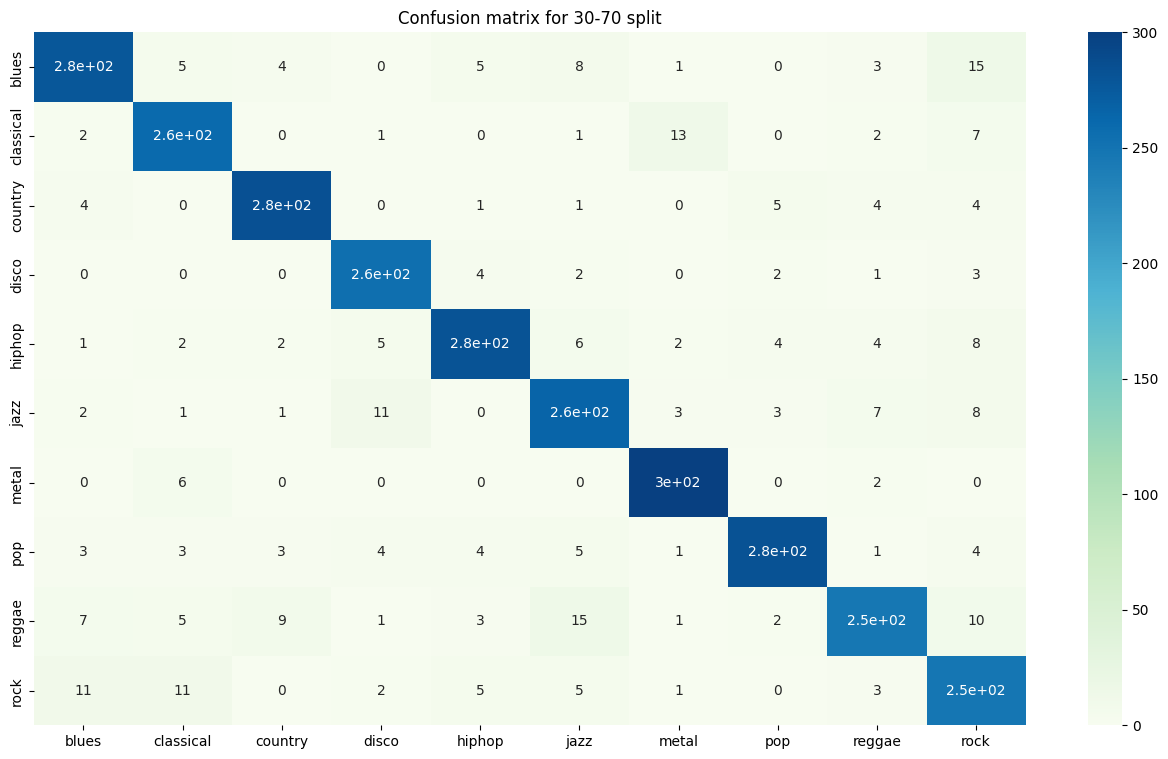

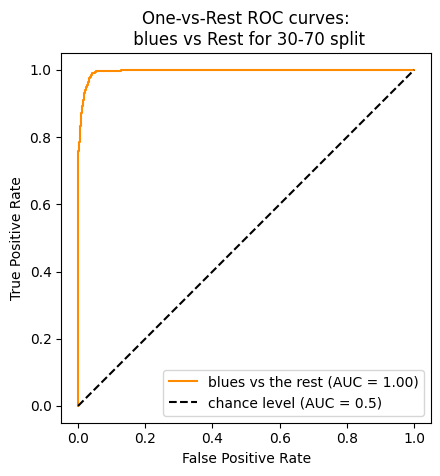

In [63]:
#Training an XGBoost classifier

xgb_class = XGBClassifier(n_estimators=1000, learning_rate=0.05)
train_model(xgb_class, 0.3, X, y, XGB_PATH, 0, 'blues' , '30-70')


---------------------------

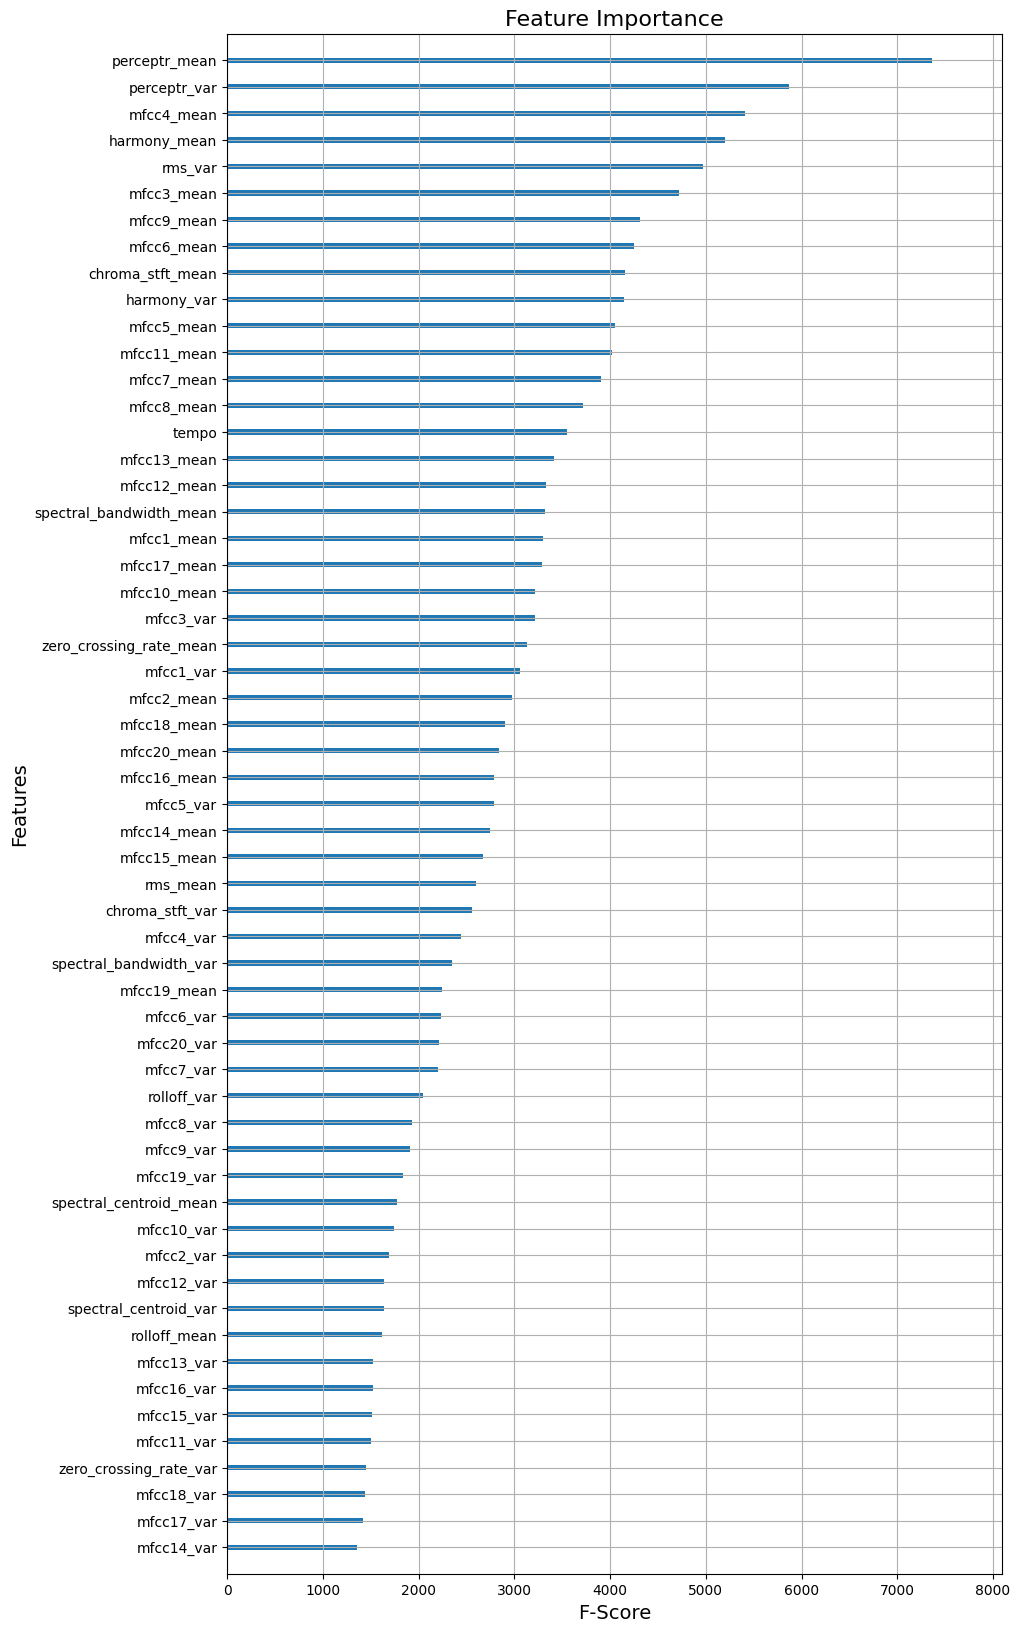

In [17]:
#Plotting the feature importance chart

fig, ax = plt.subplots(figsize=(10, 20))
xgb.plot_importance(xgb_class, ax=ax, show_values=False)
ax.set_xlabel('F-Score', fontsize=14)
ax.set_ylabel('Features', fontsize=14)
ax.set_title('Feature Importance', fontsize=16)
plt.show()

Thus, we can see that all the features are relevant and impact the classification of the label, based on their F-Score

--------------------

Specificity: 0.980
Sensitivity: 0.817
Accuracy: 0.818
Precision: 0.817
FPR: 0.020
FNR: 0.182
NPV: 0.980
FDR: 0.182
F1-Score: 0.814
MCC: 0.798


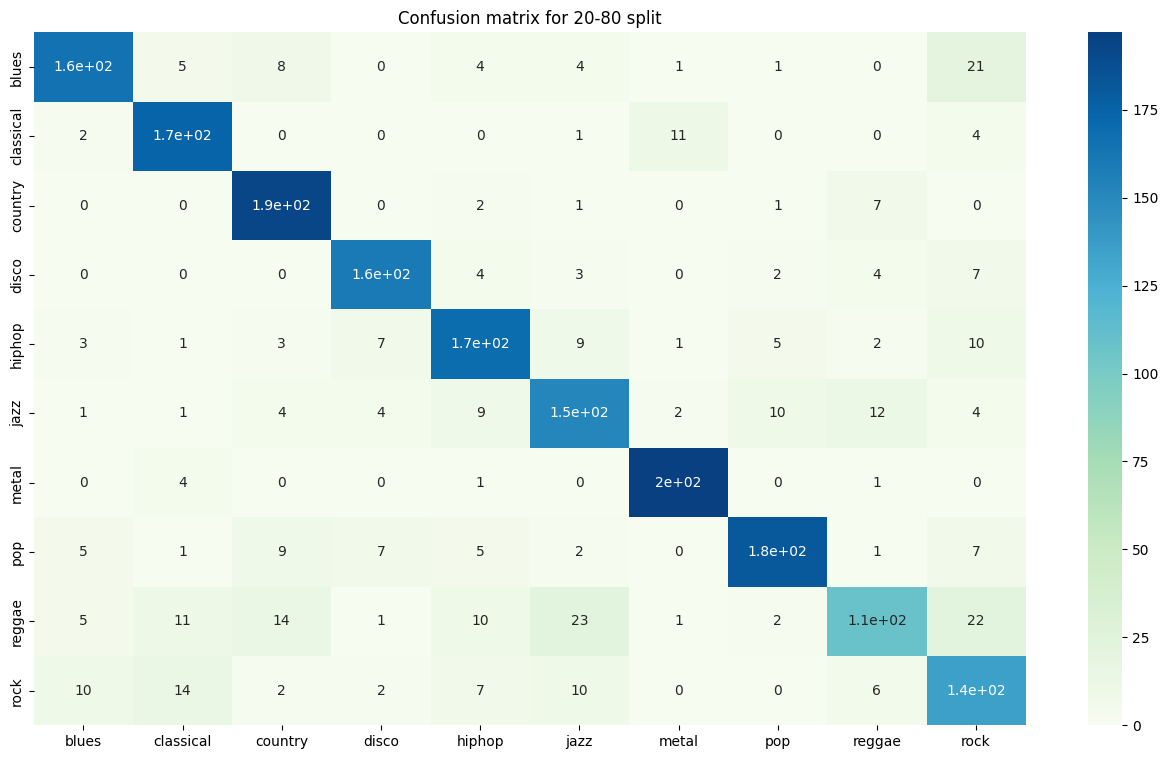

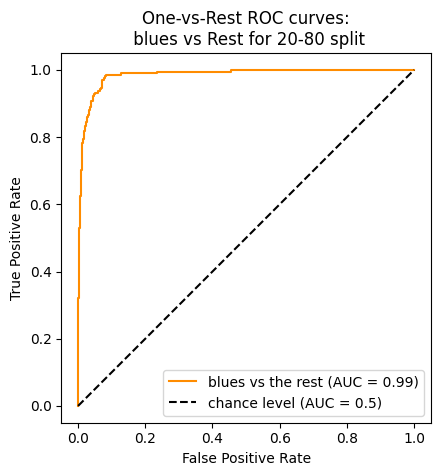

In [68]:
#Training a random forest classifier

rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
train_model(rforest, 0.2, X, y, FOREST_PATH, 0, 'blues', '20-80')

-------------------